# Cycle Data Prediction by Weather

***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section.  

***Question ***How many bike rentals would we predict if the temperature given in degrees Celsius?

***Question *** Does the scale of the features matter?

***Question *** what are effect cause by weather on bike rental scheme? 

# Libraries

In [16]:
import os,csv,io,mapsplotlib,time,folium,googlemaps,geopy,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector as sql
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
warnings.simplefilter('ignore')

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [17]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather', con=db_connection)
bikes = pd.DataFrame(data)
bikes.dtypes

Date                 object
total                 int64
temp                  int64
Maxf                  int64
Minf                  int64
Maxhum                int64
Minhum                int64
Visibility_Miles      int64
Wind_Speed_MPH        int64
Precipitation_In    float64
Events_num            int64
Events               object
month                 int64
year                  int64
dtype: object

In [35]:
bikes.tail()

,Date,total,temp,Maxf,Minf,Maxhum,Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year
604,2016-08-27,60,18,72,61,81,46,10,9,0.0,6,Sunny,8,2016
605,2016-08-28,76,20,75,59,80,44,10,9,0.0,6,Sunny,8,2016
606,2016-08-29,200,20,81,55,89,39,10,4,0.0,6,Sunny,8,2016
607,2016-08-30,208,17,70,57,83,53,10,9,0.0,6,Sunny,8,2016
608,2016-08-31,178,18,71,59,90,63,10,8,0.0,6,Sunny,8,2016


In [19]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 14 columns):
Date                609 non-null object
total               609 non-null int64
temp                609 non-null int64
Maxf                609 non-null int64
Minf                609 non-null int64
Maxhum              609 non-null int64
Minhum              609 non-null int64
Visibility_Miles    609 non-null int64
Wind_Speed_MPH      609 non-null int64
Precipitation_In    609 non-null float64
Events_num          609 non-null int64
Events              609 non-null object
month               609 non-null int64
year                609 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 66.7+ KB


## Visualizing the data

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

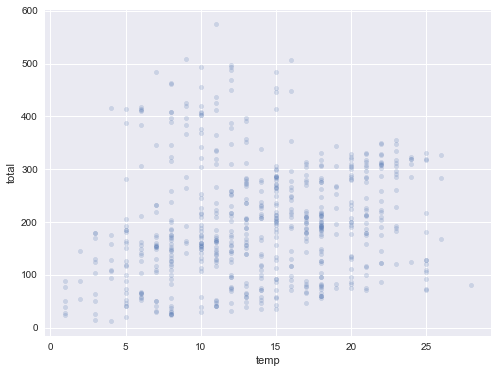

In [21]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

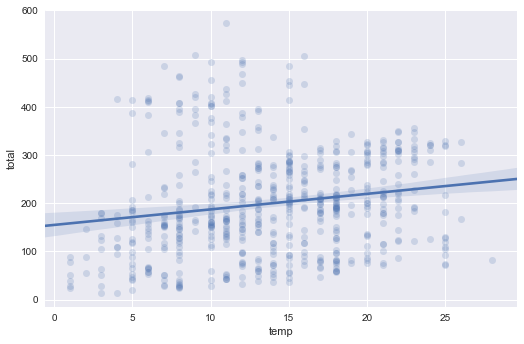

In [22]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

# Building a linear regression model

In [64]:
# create X and y where temp is the temprature and total is a total observation
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [65]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

154.859661305
[ 3.22495402]


## Using the model for prediction

In [67]:
# use the predict method
a = linreg.predict(20)
print (a)

[ 219.35874174]


## Conclusion:
The Model predicted that when temperature reach to 20 degrees Celsius there is a chance of ***121*** bicycle could be rented. 

## Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [68]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,Date,total,temp,Maxf,Minf,Maxhum,Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year,temp_F
0,2015-01-01,88,1,43,27,81,49,10,0,0.00,2,Rain,1,2015,33.8
1,2015-01-02,180,3,44,32,86,67,10,4,0.03,2,Rain,1,2015,37.4
2,2015-01-03,104,3,43,33,93,76,7,2,0.00,2,Rain,1,2015,37.4
3,2015-01-04,56,8,54,41,89,77,8,7,0.22,2,Rain,1,2015,46.4
4,2015-01-05,244,13,57,54,88,74,8,14,0.07,2,Rain,1,2015,55.4


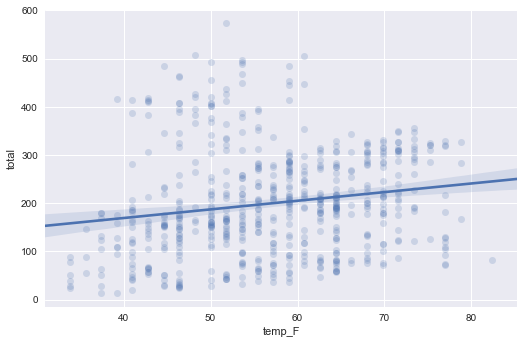

In [69]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [70]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

97.5271453636
[ 1.79164112]


In [71]:
# convert 20 degrees Celsius to Fahrenheit
20 * 1.8 + 32

68.0

In [72]:
# predict rentals for 68 degrees Fahrenheit
b = linreg.predict(68)
print (b)

[ 219.35874174]


# The difference

In [73]:
print ('Total difference in prediction form Celsius to Fahrenheit:',(b-a))

Total difference in prediction form Celsius to Fahrenheit: [ 0.]


The result shows that the scale of the features does not matter.As, both scales predict the same values of result


**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

# Visualizing the data (part 2)

In [78]:
# explore more features
feature_cols = ['temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH']

In [83]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT Events_num,Events FROM trip_weather group by  Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT Events_num,Events FROM trip_weather group by  Events_num', con=db_connection)
bikes = pd.DataFrame(data)
bikes

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


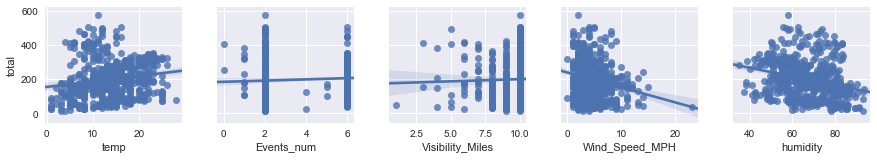

In [197]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather', con=db_connection)
bikes = pd.DataFrame(data)
bikes['humidity']=(bikes.Maxhum + bikes.Minhum)/2
# explore more features
feature_cols = ['temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH', 'humidity']
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

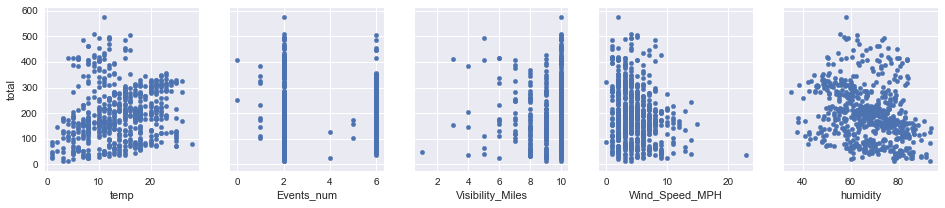

In [198]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

# Bicycle rentals by Events

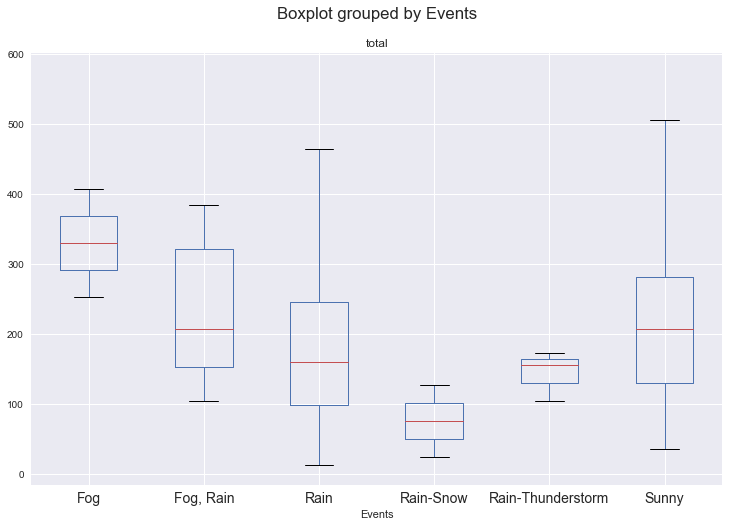

In [199]:
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='Events')

Notably:

- A line can't capture a non-linear relationship.
- There are less rentals in winter than in spring (?)

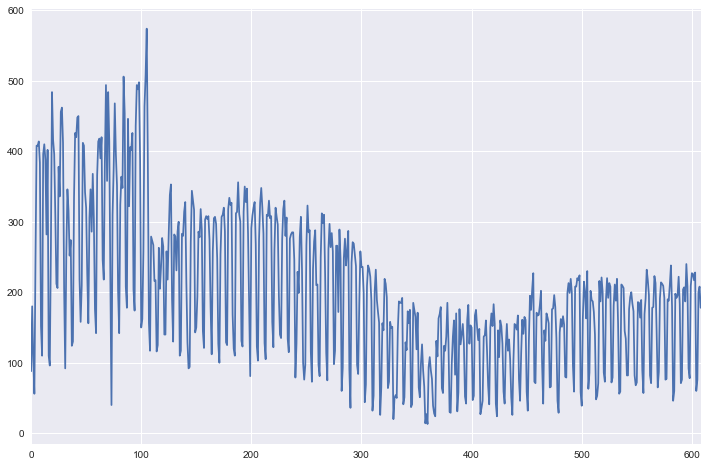

In [200]:
# line plot of rentals
bikes.total.plot()

What does this tell us?

There are less rentals in the winter than the spring, but only because the system is experiencing **overall decay** and the winter months happen to come after the spring months.

In [201]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,total,temp,Maxf,Minf,Maxhum,Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,month,year,humidity
total,1.000000,0.171038,0.191137,0.128383,-0.288507,-0.221978,0.028374,-0.223263,-0.241635,0.066881,-0.153841,-0.444737,-0.271274
temp,0.171038,1.000000,0.969747,0.946960,-0.629958,-0.606063,0.361507,-0.059260,-0.239945,0.825399,0.282011,-0.009845,-0.674047
Maxf,0.191137,0.969747,1.000000,0.850083,-0.628851,-0.715949,0.385667,-0.142499,-0.296065,0.806354,0.250732,0.013180,-0.747567
Minf,0.128383,0.946960,0.850083,1.000000,-0.573038,-0.403204,0.285961,0.049577,-0.148468,0.788437,0.303514,-0.040700,-0.513429
Maxhum,-0.288507,-0.629958,-0.628851,-0.573038,1.000000,0.647923,-0.335181,0.152543,0.321042,-0.510689,-0.239915,0.372230,0.858473
Minhum,-0.221978,-0.606063,-0.715949,-0.403204,0.647923,1.000000,-0.481033,0.276615,0.422462,-0.493925,-0.177272,0.064655,0.946872
Visibility_Miles,0.028374,0.361507,0.385667,0.285961,-0.335181,-0.481033,1.000000,0.034379,-0.382224,0.327864,0.066043,0.171817,-0.465402
Wind_Speed_MPH,-0.223263,-0.059260,-0.142499,0.049577,0.152543,0.276615,0.034379,1.000000,0.287960,-0.066293,0.058717,0.149078,0.250653
Precipitation_In,-0.241635,-0.239945,-0.296065,-0.148468,0.321042,0.422462,-0.382224,0.287960,1.000000,-0.256100,0.033554,-0.030281,0.419997
Events_num,0.066881,0.825399,0.806354,0.788437,-0.510689,-0.493925,0.327864,-0.066293,-0.256100,1.000000,0.354204,0.024837,-0.548186


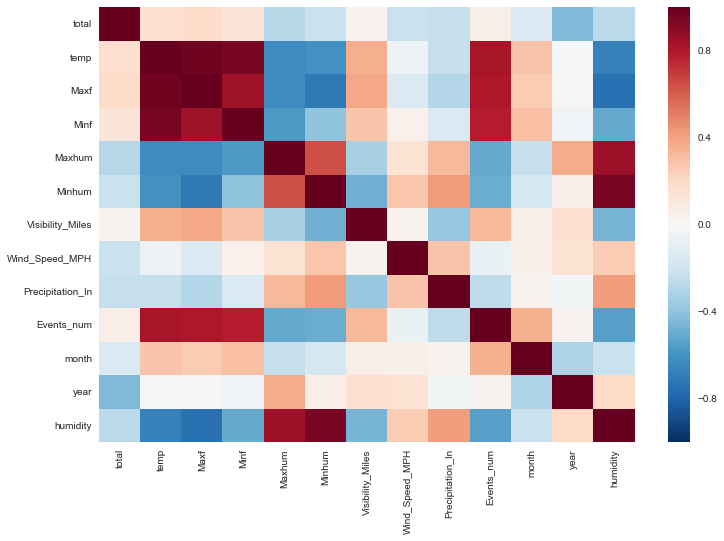

In [203]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

# Relationships between variables

In [204]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather', con=db_connection)
bikes = pd.DataFrame(data)

In [205]:
bikes['humidity']=(bikes.Maxhum + bikes.Minhum)/2
bikes.head()

,Date,total,temp,Maxf,Minf,Maxhum,Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year,humidity
0,2015-01-01,88,1,43,27,81,49,10,0,0.00,2,Rain,1,2015,65.0
1,2015-01-02,180,3,44,32,86,67,10,4,0.03,2,Rain,1,2015,76.5
2,2015-01-03,104,3,43,33,93,76,7,2,0.00,2,Rain,1,2015,84.5
3,2015-01-04,56,8,54,41,89,77,8,7,0.22,2,Rain,1,2015,83.0
4,2015-01-05,244,13,57,54,88,74,8,14,0.07,2,Rain,1,2015,81.0


In [206]:
# create a list of features
feature_cols = ['temp','Wind_Speed_MPH','humidity','Precipitation_In','Events_num']

In [207]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

324.615572274
[  4.50336385  -5.72943396  -1.46296321 -68.53515488 -14.09003739]


In [208]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [209]:
BabyDataSet = zip(feature_cols,linreg.coef_)

In [210]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT Events_num,Events FROM trip_weather group by  Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT Events_num,Events FROM trip_weather group by  Events_num', con=db_connection)
bikes = pd.DataFrame(data)
bikes

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


In [211]:
BabyDataSet = list(zip(feature_cols,linreg.coef_))
BabyDataSet

[('temp', 4.5033638461235732),
 ('Wind_Speed_MPH', -5.7294339568329979),
 ('humidity', -1.4629632078092731),
 ('Precipitation_In', -68.535154877134516),
 ('Events_num', -14.090037389117011)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 4.50 bikes**.
- Holding all other features fixed, a 1 unit increase in **'Wind_Speed_MPH** is associated with a **rental decrease of -5.72 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of -1.46 bikes**.
- Holding all other features fixed, a 1 unit increase in **Precipitation_In** is associated with a **rental decrease of -68.53 bikes**.

- Holding all other features fixed, a 1 unit increase in **Events_num** is associated with a **rental decrease of -14.09 bikes**


In [212]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [213]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


In [214]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


As we can notice that after applying some new set of predicted values. The model shows very different result. The value of MAE is the same before, but mean squared error and root mean squared error are larger than before.

# Comparing models with train/test split and RMSE

In [215]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT twdate Date,Bike_rented total,Mean_Temperature_C temp,Max_Temperature_F Maxf,Min_TemperatureF Minf,Max_Humidity Maxhum,Min_Humidity Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year FROM trip_weather', con=db_connection)
bikes = pd.DataFrame(data)

In [216]:
bikes['humidity']=(bikes.Maxhum + bikes.Minhum)/2
bikes.head()

,Date,total,temp,Maxf,Minf,Maxhum,Minhum,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,Events,month,year,humidity
0,2015-01-01,88,1,43,27,81,49,10,0,0.00,2,Rain,1,2015,65.0
1,2015-01-02,180,3,44,32,86,67,10,4,0.03,2,Rain,1,2015,76.5
2,2015-01-03,104,3,43,33,93,76,7,2,0.00,2,Rain,1,2015,84.5
3,2015-01-04,56,8,54,41,89,77,8,7,0.22,2,Rain,1,2015,83.0
4,2015-01-05,244,13,57,54,88,74,8,14,0.07,2,Rain,1,2015,81.0


# Features selection

In [223]:
# create a list of features
feature_cols = ['temp','Wind_Speed_MPH','humidity','Precipitation_In','Events_num']

In [224]:
from sklearn.cross_validation import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [218]:
# compare different sets of features
print (train_test_rmse(['temp','Wind_Speed_MPH','humidity','Precipitation_In','Events_num']))
print (train_test_rmse(['temp','Wind_Speed_MPH','humidity','Precipitation_In']))
print (train_test_rmse(['temp','Wind_Speed_MPH','humidity']))

95.6891372885
98.1231782742
98.3398920602


In [225]:
print (train_test_rmse(['temp','Wind_Speed_MPH','humidity','Events_num']))

96.3085655303


In [226]:
print (train_test_rmse(['temp','humidity','Events_num']))

98.3802263221


In [227]:
print (train_test_rmse(['Wind_Speed_MPH','humidity','Events_num']))

97.8009125859


In [228]:
print (train_test_rmse(['temp']))

99.8054559912


In [229]:
print (train_test_rmse(['temp','Wind_Speed_MPH']))

97.309087016


In [230]:
print (train_test_rmse(['temp','Wind_Speed_MPH','humidity','Precipitation_In','Events_num']))

95.6891372885


From the RMSE result, I decided to keep above columns. 

## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which we may want to measure our regression model.

In [219]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281046,
        190.69281046,  190.69281046,  190.69281046,  190.69281

In [222]:
# compute null RMSE
print ('Predicting the mean response value:',np.sqrt(metrics.mean_squared_error(y_test, y_null)))

Predicting the mean response value: 102.007386702


## Conclusion:
***Question ***How many bike rentals would we predict if the temperature given in degrees Celsius?

- The Model predicted that when temperature reach to 20 degrees Celsius there is a chance of ***121*** bicycle could be rented. 

***Question *** Does the scale of the features matter?

-The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

***Question *** what are effect cause by weather on bike rental scheme?

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 4.50 bikes**.
- Holding all other features fixed, a 1 unit increase in **'Wind_Speed_MPH** is associated with a **rental decrease of -5.72 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of -1.46 bikes**.
- Holding all other features fixed, a 1 unit increase in **Precipitation_In** is associated with a **rental decrease of -68.53 bikes**.

- Holding all other features fixed, a 1 unit increase in **Events_num** is associated with a **rental decrease of -14.09 bikes**

- From the obtain result, after applying some new set of predicted values. The model shows very different result. The value of MAE is the same before, but mean squared error and root mean squared error are larger than before. That’s change in predicted values will effect on MSE and RMSE. The lower the RMSE is better. So, we could conclude that change in weather condition will effect on Bike Rental.

-----------------------------------------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)